In [ ]:
#Replicate #1 ML- Linear Regression
#Replicated with the help of Abrambeyer(Kaggle) and Megha Narang(YouTube)

In [500]:
#Libraries/csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, accuracy_score
from sklearn import metrics
import seaborn as sns

df = pd.read_csv('C:\\Users\dylan\Python Projects\ML\possum.csv')

In [501]:
df.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [502]:
df.dropna(inplace=True)
df.describe()

,case,site,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,52.762376,3.673267,3.821782,92.730693,56.960396,87.269307,37.049505,68.398020,48.133663,15.050495,27.064356,32.638614
std,30.573894,2.366892,1.915182,3.518714,3.102679,4.196802,1.971681,4.413502,4.060352,1.058643,2.020722,2.727745
min,1.000000,1.000000,1.000000,82.500000,50.000000,75.000000,32.000000,60.300000,41.300000,12.800000,22.000000,25.000000
25%,26.000000,1.000000,2.000000,90.700000,55.000000,84.500000,36.000000,64.500000,44.800000,14.400000,25.500000,31.000000
50%,54.000000,4.000000,3.000000,92.900000,56.400000,88.000000,37.000000,67.900000,46.800000,14.900000,27.000000,32.500000
75%,79.000000,6.000000,5.000000,94.800000,58.100000,90.000000,38.000000,72.500000,52.000000,15.700000,28.000000,34.000000
max,104.000000,7.000000,9.000000,103.100000,68.600000,96.500000,43.000000,77.900000,56.200000,17.800000,32.000000,40.000000


In [503]:
#Replacing non-numerics(Sex and Population) with numerical values
sex_dict = {'m': 0, 'f': 1}
df['numeric_sex'] = df['sex'].map(sex_dict)
#the numeric pop/sex column replaced the sex/pop column 
#in the df datasets with sex/pop_dict which is either 1/0

pop_dict = {'Vic': 0, 'other': 1}
df['numeric_pop'] = df['Pop'].map(pop_dict)

df.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly,numeric_sex,numeric_pop
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0,0,0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0,1,0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0,1,0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0,1,0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0,1,0


RMSE: 2.1802497247063664
[82.16069797 86.89247659 87.88805637 87.52125239 91.22201244 84.80017101
 92.88741932 85.18810279 86.74994596 88.05326658 90.00468716 85.17212595
 85.70424373 83.88150454 87.81372345 92.90093163 90.90161425 83.8445918
 91.59231311 95.29875187 86.05434136 87.75178433 84.55577861 85.3200178
 87.35120365 87.18433182 88.32911053 87.98998111 93.33907338 81.65214586
 81.00871538]


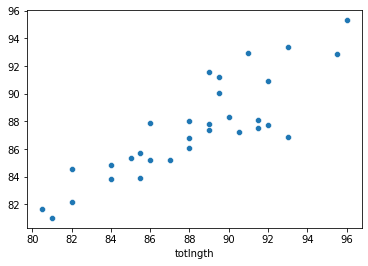

In [504]:
#Making prediction with variables with largest correlation
#New variables for X
x = df[['hdlngth', 'skullw','taill', 'footlgth', 'belly', 'numeric_sex', 'numeric_pop', 'age']]
y = df['totlngth']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2)
ml = LinearRegression()
ml.fit(x_train,y_train)
predictions = ml.predict(x_test)
sns.scatterplot(x=y_test,y=predictions)

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,predictions)))
print(predictions)

In [505]:
x = df[['hdlngth', 'skullw','taill', 'footlgth', 'belly', 'numeric_sex', 'numeric_pop', 'age']]
y = df[['totlngth']]
x

,hdlngth,skullw,taill,footlgth,belly,numeric_sex,numeric_pop,age
0,94.1,60.4,36.0,74.5,36.0,0,0,8.0
1,92.5,57.6,36.5,72.5,33.0,1,0,6.0
2,94.0,60.0,39.0,75.4,34.0,1,0,6.0
3,93.2,57.1,38.0,76.1,34.0,1,0,6.0
4,91.5,56.3,36.0,71.0,33.0,1,0,2.0
...,...,...,...,...,...,...,...,...
99,89.5,56.0,36.5,66.0,27.0,0,1,1.0
100,88.6,54.7,39.0,64.4,33.0,0,1,1.0
101,92.4,55.0,38.0,63.5,30.0,1,1,6.0
102,91.5,55.2,36.5,62.9,29.0,0,1,4.0


In [506]:
ypred = ml.predict(x_test)
ytrue = df['totlngth']
print(ypred)
print(ytrue)

[82.16069797 86.89247659 87.88805637 87.52125239 91.22201244 84.80017101
 92.88741932 85.18810279 86.74994596 88.05326658 90.00468716 85.17212595
 85.70424373 83.88150454 87.81372345 92.90093163 90.90161425 83.8445918
 91.59231311 95.29875187 86.05434136 87.75178433 84.55577861 85.3200178
 87.35120365 87.18433182 88.32911053 87.98998111 93.33907338 81.65214586
 81.00871538]
0      89.0
1      91.5
2      95.5
3      92.0
4      85.5
       ... 
99     81.5
100    82.5
101    89.0
102    82.5
103    89.0
Name: totlngth, Length: 101, dtype: float64


In [507]:
#Predictions with head data(col 0)
ml.predict([[94.1, 60.4, 36.0, 74.5, 36.0, 0, 0, 8.0]])

C:\Users\dylan\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([87.81372345])

In [508]:
df[['totlngth','hdlngth', 'skullw','taill', 'footlgth', 'belly', 'numeric_sex', 'numeric_pop', 'age']]
print(((88.81-89)/89)*100)
#88.71 -- 89.0 == 0.3% percent error

-0.2134831460674132


In [509]:
r2_score(y_test, ypred)
#score= 68% --> needs to be highger

0.7004228090329553

Text(0.5, 1.0, 'Actual vs Predicted')

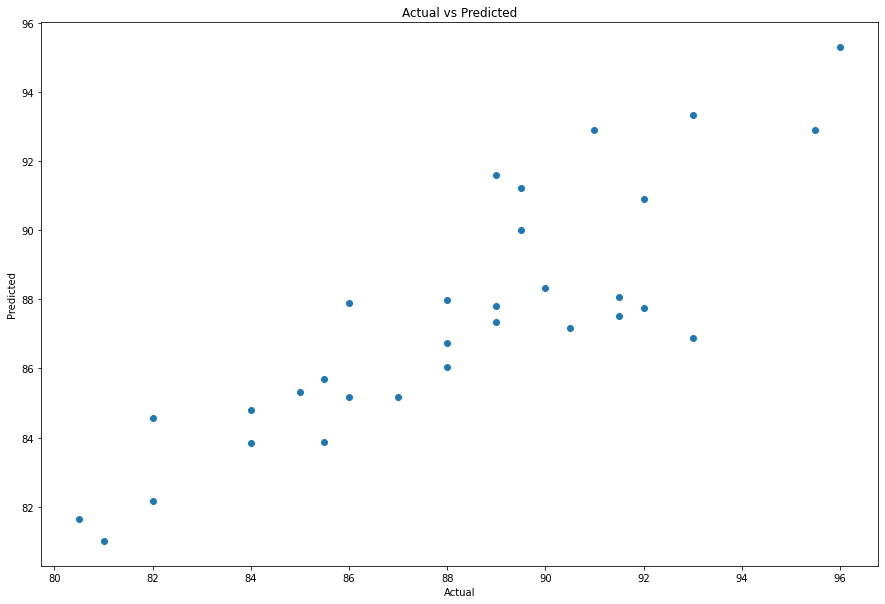

In [510]:
plt.figure(figsize=(15,10))
plt.scatter(y_test, ypred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')

In [511]:
predydf = pd.DataFrame({'Actual Value':y_test, 'Predicted Value': ypred, 'Difference': y_test-ypred})
predydf[0:20]

,Actual Value,Predicted Value,Difference
81,82.0,82.160698,-0.160698
30,93.0,86.892477,6.107523
60,86.0,87.888056,-1.888056
24,91.5,87.521252,3.978748
16,89.5,91.222012,-1.722012
23,84.0,84.800171,-0.800171
2,95.5,92.887419,2.612581
27,87.0,85.188103,1.811897
28,88.0,86.749946,1.250054
13,91.5,88.053267,3.446733


In [514]:
r2_score(y_test, ypred)
#proportion of variance(how much avrgd predicted values vary from actual) 
#in the dependent variable that can be explained by the independent variable
#Here, 70% variance = mid/high performance

0.7004228090329553